## Local Distances

In [1]:
import sys 
sys.path.append('../')
from fcc_DRs import *
%matplotlib inline

FIt-SNE repository not detected. Functionality will be disabled.


In [2]:
# read in Macosko retina data
retina = RNA_counts.from_file('../inputs/GSM1626793_P14Retina_1.processed.norowlabels.tsv.gz', labels=[None,0], barcodefile='pymethods_out/retina_clu.csv')
# read in Herring colon data
colon = RNA_counts.from_file('../inputs/GSM2743164_rep1_colon_rnaseq.processed.norowlabels.tsv.gz', labels=[None,0], barcodefile='pymethods_out/colon_clu.csv')

In [3]:
# look at dimensions of counts matrix (cells, genes)
retina.data.shape

(1326, 500)

In [4]:
# look at dimensions of counts matrix (cells, genes)
colon.data.shape

(1117, 500)

In [5]:
# create dictionaries for dumping results into
final_distance_stats = {'Retina':{'R':{}, 'EMD':{}, 'KLD':{}, 'Knn Pres.':{}}, 'Colon':{'R':{}, 'EMD':{}, 'KLD':{}, 'Knn Pres.':{}}}

In [6]:
# choose value for K-nearest neighbor calculations. We use 30 because that is the standard perplexity chosen for DR techniques here.
k = 30

---

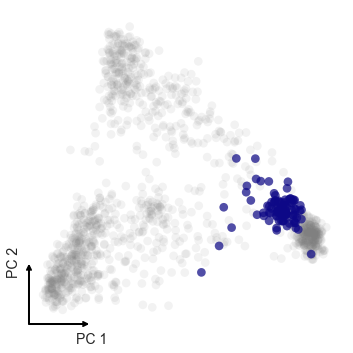

In [7]:
retina_PCA2 = fcc_PCA(matrix=retina.arcsinh_norm(), barcodes=retina.barcodes, n_components=2)
retina_PCA2.plot_barcodes(ranks=['4']) # cones

In [8]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform='arcsinh'), post=retina_PCA2.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['4']), post=retina_PCA2.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['PCA (2)'], final_distance_stats['Retina']['EMD']['PCA (2)'], final_distance_stats['Retina']['KLD']['PCA (2)'], final_distance_stats['Retina']['Knn Pres.']['PCA (2)'] = mantel_stats[0], EMD, KLD, knn

R: 0.4003
EMD: 0.311
KLD: 0.3047
Knn Pres.: 60.163
CPU times: user 281 ms, sys: 19.5 ms, total: 300 ms
Wall time: 317 ms


CPU times: user 17.5 s, sys: 354 ms, total: 17.8 s
Wall time: 17.3 s


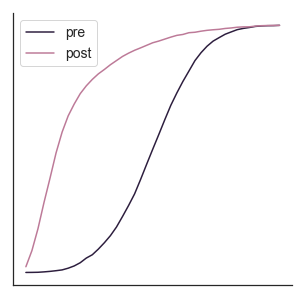

<Figure size 504x504 with 0 Axes>

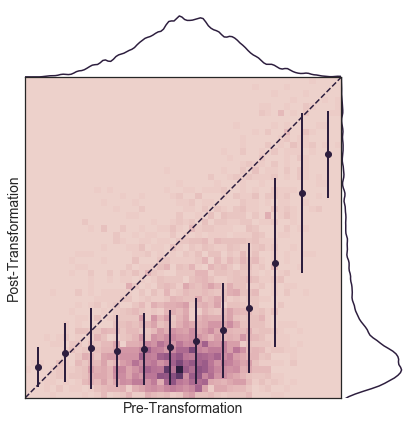

In [9]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_PCA2_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_PCA2_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

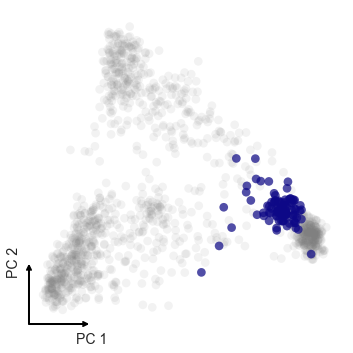

In [10]:
retina_PCA10 = fcc_PCA(matrix=retina.arcsinh_norm(), barcodes=retina.barcodes, n_components=10)
retina_PCA10.plot_barcodes(ranks=['4']) # cones

In [11]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform='arcsinh'), post=retina_PCA10.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['4']), post=retina_PCA10.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['PCA (10)'], final_distance_stats['Retina']['EMD']['PCA (10)'], final_distance_stats['Retina']['KLD']['PCA (10)'], final_distance_stats['Retina']['Knn Pres.']['PCA (10)'] = mantel_stats[0], EMD, KLD, knn

R: 0.4782
EMD: 0.1501
KLD: 0.1123
Knn Pres.: 65.5048
CPU times: user 304 ms, sys: 23.3 ms, total: 328 ms
Wall time: 284 ms


CPU times: user 18 s, sys: 390 ms, total: 18.4 s
Wall time: 17.9 s


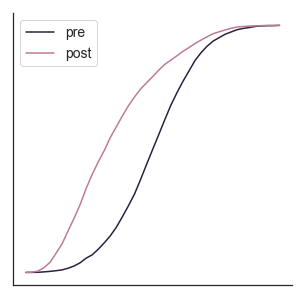

<Figure size 504x504 with 0 Axes>

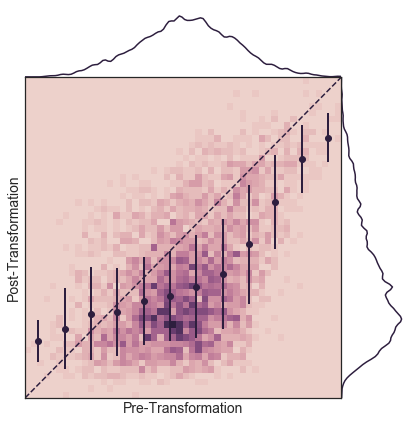

In [12]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_PCA10_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_PCA10_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

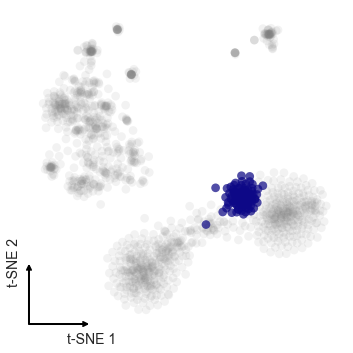

In [13]:
retina_tSNE = DR.from_file('pymethods_out/retina_tSNE.csv', name='t-SNE', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_tSNE.plot_barcodes(ranks=['4']) # cones

In [14]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform='arcsinh'), post=retina_tSNE.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['4']), post=retina_tSNE.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['t-SNE'], final_distance_stats['Retina']['EMD']['t-SNE'], final_distance_stats['Retina']['KLD']['t-SNE'], final_distance_stats['Retina']['Knn Pres.']['t-SNE'] = mantel_stats[0], EMD, KLD, knn

R: 0.3688
EMD: 0.2843
KLD: 0.1463
Knn Pres.: 66.2743
CPU times: user 268 ms, sys: 18.5 ms, total: 287 ms
Wall time: 299 ms


CPU times: user 17.5 s, sys: 343 ms, total: 17.8 s
Wall time: 17.2 s


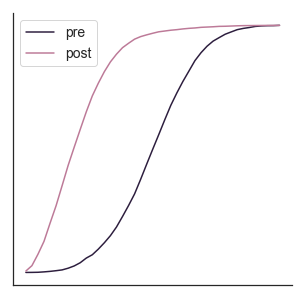

<Figure size 504x504 with 0 Axes>

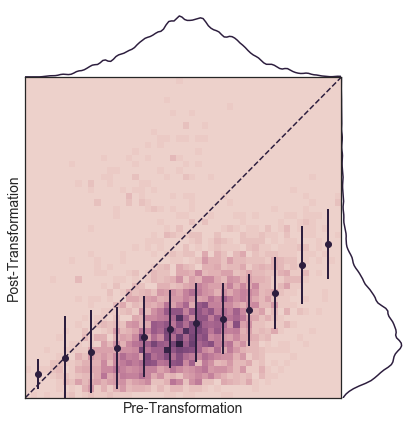

In [15]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_tSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_tSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

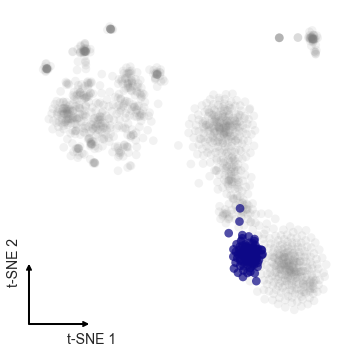

In [16]:
retina_FItSNE = DR.from_file('pymethods_out/retina_FItSNE.csv', name='t-SNE', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_FItSNE.plot_barcodes(ranks=['4']) # rods & cones

In [17]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform='arcsinh'), post=retina_FItSNE.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['4']), post=retina_FItSNE.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['FIt-SNE'], final_distance_stats['Retina']['EMD']['FIt-SNE'], final_distance_stats['Retina']['KLD']['FIt-SNE'], final_distance_stats['Retina']['Knn Pres.']['FIt-SNE'] = mantel_stats[0], EMD, KLD, knn

R: 0.3572
EMD: 0.2908
KLD: 0.1563
Knn Pres.: 66.5912
CPU times: user 312 ms, sys: 24.6 ms, total: 337 ms
Wall time: 289 ms


CPU times: user 17.5 s, sys: 370 ms, total: 17.9 s
Wall time: 17.3 s


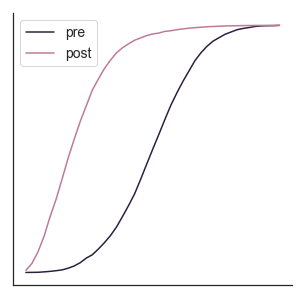

<Figure size 504x504 with 0 Axes>

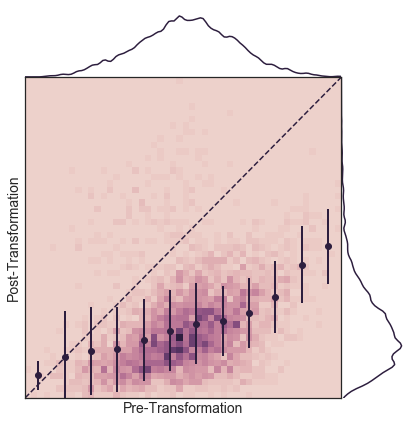

In [18]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_FItSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_FItSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

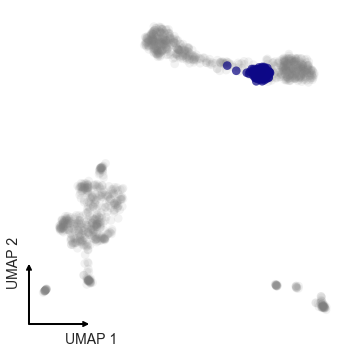

In [19]:
retina_UMAP = DR.from_file('pymethods_out/retina_UMAP.csv', name='UMAP', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_UMAP.plot_barcodes(ranks=['4']) # rods & cones

In [20]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform='arcsinh'), post=retina_UMAP.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['4']), post=retina_UMAP.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['UMAP'], final_distance_stats['Retina']['EMD']['UMAP'], final_distance_stats['Retina']['KLD']['UMAP'], final_distance_stats['Retina']['Knn Pres.']['UMAP'] = mantel_stats[0], EMD, KLD, knn

R: -0.0107
EMD: 0.3229
KLD: 0.2755
Knn Pres.: 58.6464
CPU times: user 310 ms, sys: 24.5 ms, total: 334 ms
Wall time: 288 ms


CPU times: user 17.6 s, sys: 394 ms, total: 18 s
Wall time: 17.7 s


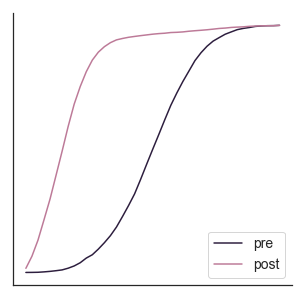

<Figure size 504x504 with 0 Axes>

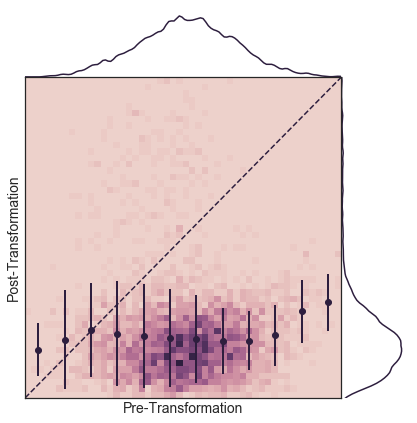

In [21]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_UMAP_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_UMAP_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

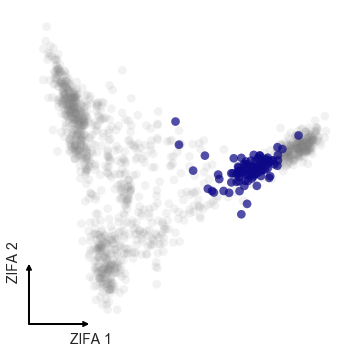

In [7]:
retina_ZIFA = DR.from_file('pymethods_out/retina_ZIFA.csv', name='ZIFA', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_ZIFA.plot_barcodes(ranks=['4']) # rods & cones

In [8]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform='log2'), post=retina_ZIFA.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='log2', ranks=['4']), post=retina_ZIFA.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['ZIFA'], final_distance_stats['Retina']['EMD']['ZIFA'], final_distance_stats['Retina']['KLD']['ZIFA'], final_distance_stats['Retina']['Knn Pres.']['ZIFA'] = mantel_stats[0], EMD, KLD, knn

R: 0.4366
EMD: 0.0323
KLD: 0.2647
Knn Pres.: 62.766
CPU times: user 256 ms, sys: 21.1 ms, total: 277 ms
Wall time: 294 ms


CPU times: user 17.4 s, sys: 367 ms, total: 17.8 s
Wall time: 17.2 s


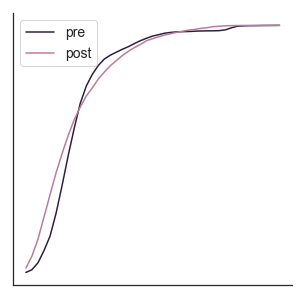

<Figure size 504x504 with 0 Axes>

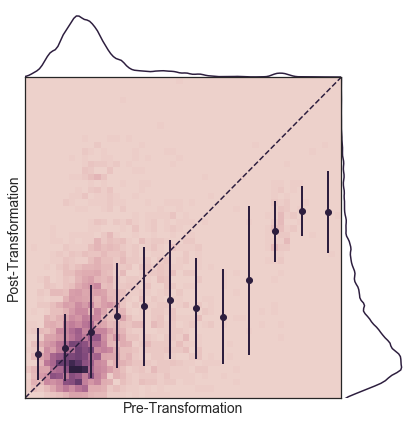

In [9]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_ZIFA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_ZIFA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

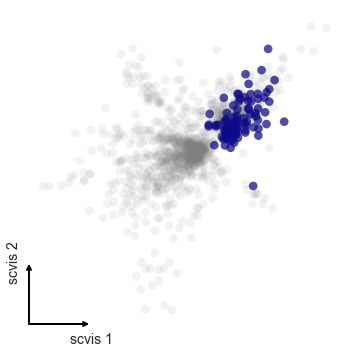

In [25]:
retina_scvis = DR.from_file('scvis_out/retina/perplexity_30_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.tsv', name='scvis', labels=[0,0], barcodefile='pymethods_out/retina_clu.csv')
retina_scvis.plot_barcodes(ranks=['4']) # rods & cones

In [26]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform=None), post=retina_scvis.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['4']), post=retina_scvis.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['scvis'], final_distance_stats['Retina']['EMD']['scvis'], final_distance_stats['Retina']['KLD']['scvis'], final_distance_stats['Retina']['Knn Pres.']['scvis'] = mantel_stats[0], EMD, KLD, knn

R: 0.9088
EMD: 0.0129
KLD: 0.0532
Knn Pres.: 89.407
CPU times: user 281 ms, sys: 20.5 ms, total: 301 ms
Wall time: 307 ms


CPU times: user 17.6 s, sys: 393 ms, total: 18 s
Wall time: 17.8 s


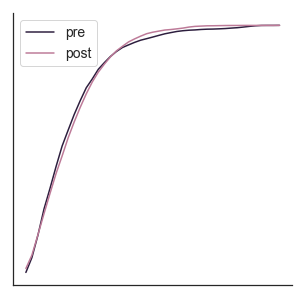

<Figure size 504x504 with 0 Axes>

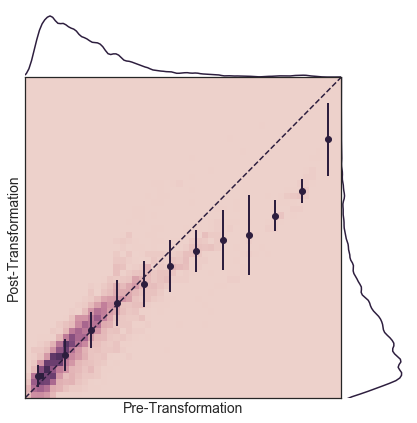

In [27]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_scvis_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_scvis_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

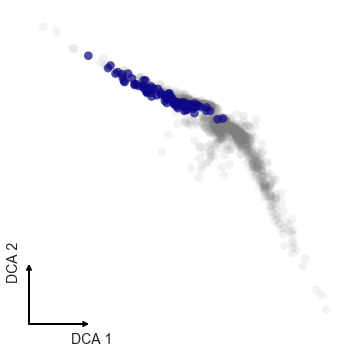

In [28]:
retina_DCA = DR.from_file('pymethods_out/retina_DCA.csv', name='DCA', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_DCA.plot_barcodes(ranks=['4']) # rods & cones

In [29]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform=None), post=retina_DCA.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['4']), post=retina_DCA.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['DCA'], final_distance_stats['Retina']['EMD']['DCA'], final_distance_stats['Retina']['KLD']['DCA'], final_distance_stats['Retina']['Knn Pres.']['DCA'] = mantel_stats[0], EMD, KLD, knn

R: 0.7993
EMD: 0.0337
KLD: 0.1484
Knn Pres.: 78.3386
CPU times: user 265 ms, sys: 18.3 ms, total: 284 ms
Wall time: 246 ms


CPU times: user 17.7 s, sys: 363 ms, total: 18.1 s
Wall time: 17.8 s


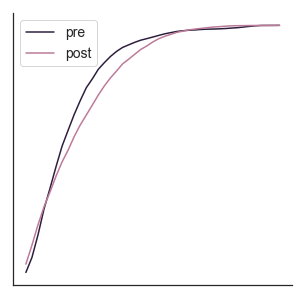

<Figure size 504x504 with 0 Axes>

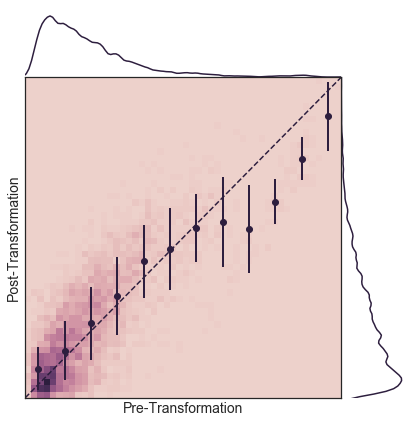

In [30]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_DCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_DCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

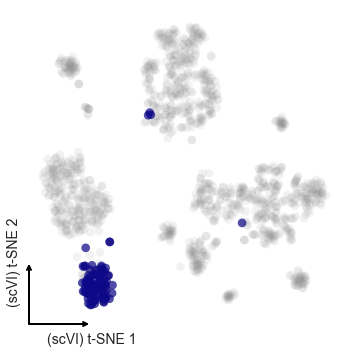

In [31]:
retina_scVI = DR.from_file('pymethods_out/retina_scVI.csv', name='scVI', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_scVI_tSNE = DR.from_file('pymethods_out/retina_scVI_tSNE.csv', name='(scVI) t-SNE', labels=[None,None], barcodefile='pymethods_out/retina_clu.csv')
retina_scVI_tSNE.plot_barcodes(ranks=['4']) # rods & cones

In [32]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform=None), post=retina_scVI.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['4']), post=retina_scVI.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['scVI'], final_distance_stats['Retina']['EMD']['scVI'], final_distance_stats['Retina']['KLD']['scVI'], final_distance_stats['Retina']['Knn Pres.']['scVI'] = mantel_stats[0], EMD, KLD, knn

R: 0.2022
EMD: 0.2139
KLD: 0.2792
Knn Pres.: 60.4799
CPU times: user 266 ms, sys: 18.1 ms, total: 284 ms
Wall time: 253 ms


CPU times: user 18 s, sys: 341 ms, total: 18.3 s
Wall time: 18.4 s


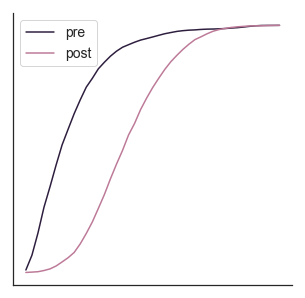

<Figure size 504x504 with 0 Axes>

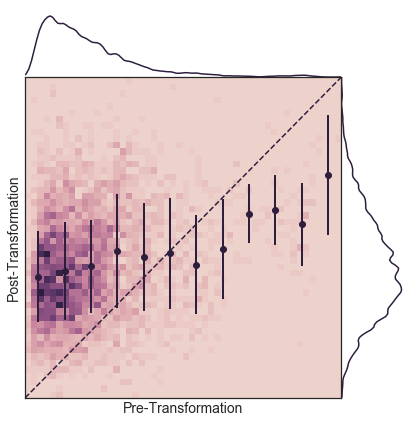

In [33]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_scVI_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_scVI_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

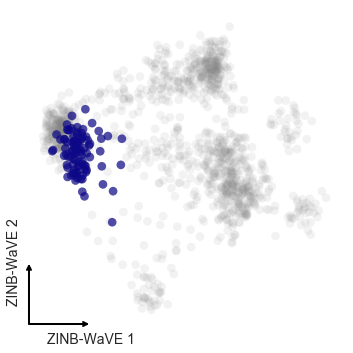

In [34]:
retina_ZINBWAVE = DR.from_file('Rmethods_out/retina_ZINB-WAVE.csv', name='ZINB-WaVE', labels=[None,0], barcodefile='pymethods_out/retina_clu.csv')
retina_ZINBWAVE.plot_barcodes(ranks=['4']) # cones
retina_ZINBWAVE.plot_barcodes(ranks=['4'], figsize=(4,4), save_to='../images/cones_ZINBWAVE.png')

In [35]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform=None), post=retina_ZINBWAVE.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['4']), post=retina_ZINBWAVE.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['ZINBWAVE'], final_distance_stats['Retina']['EMD']['ZINBWAVE'], final_distance_stats['Retina']['KLD']['ZINBWAVE'], final_distance_stats['Retina']['Knn Pres.']['ZINBWAVE'] = mantel_stats[0], EMD, KLD, knn

R: 0.2119
EMD: 0.0439
KLD: 0.3754
Knn Pres.: 59.7103
CPU times: user 294 ms, sys: 23.4 ms, total: 317 ms
Wall time: 236 ms


CPU times: user 17.3 s, sys: 351 ms, total: 17.6 s
Wall time: 17 s


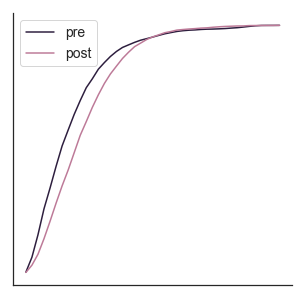

<Figure size 504x504 with 0 Axes>

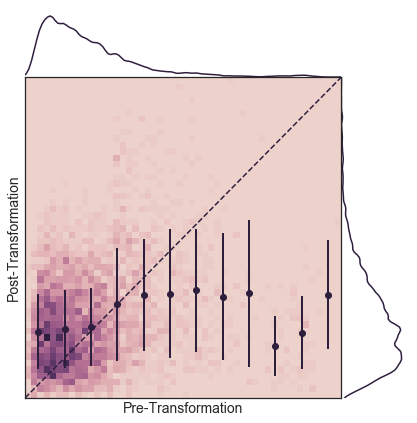

In [36]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_ZINBWAVE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_ZINBWAVE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

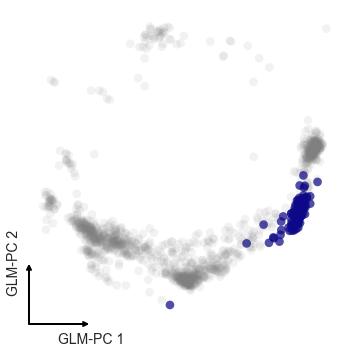

In [37]:
retina_GLMPCA = DR.from_file('Rmethods_out/retina_GLM-PCA.csv', name='GLM-PC', labels=[None,0], barcodefile='pymethods_out/retina_clu.csv')
retina_GLMPCA.plot_barcodes(ranks=['4']) # rods & cones

In [38]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform=None), post=retina_GLMPCA.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['4']), post=retina_GLMPCA.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['GLMPCA'], final_distance_stats['Retina']['EMD']['GLMPCA'], final_distance_stats['Retina']['KLD']['GLMPCA'], final_distance_stats['Retina']['Knn Pres.']['GLMPCA'] = mantel_stats[0], EMD, KLD, knn

R: 0.256
EMD: 0.0811
KLD: 0.4764
Knn Pres.: 59.2123
CPU times: user 273 ms, sys: 18 ms, total: 291 ms
Wall time: 240 ms


CPU times: user 17 s, sys: 334 ms, total: 17.3 s
Wall time: 16.7 s


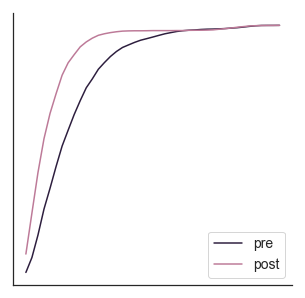

<Figure size 504x504 with 0 Axes>

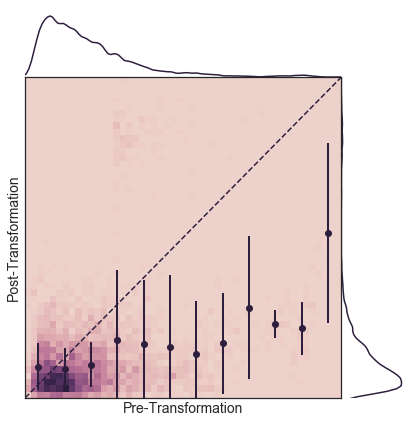

In [39]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_GLMPCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_GLMPCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

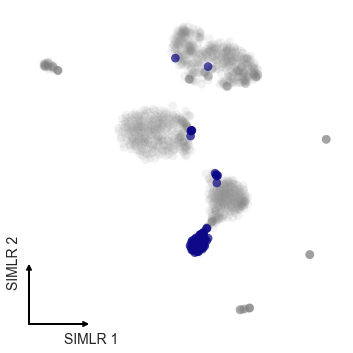

In [40]:
retina_SIMLR = DR.from_file('Rmethods_out/retina_SIMLR_F.csv', name='SIMLR', labels=[None,0], barcodefile='pymethods_out/retina_clu.csv')
retina_SIMLR.plot_barcodes(ranks=['4']) # rods & cones

In [41]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['4'],transform='arcsinh'), post=retina_SIMLR.distance_matrix(ranks=['4']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['4']), post=retina_SIMLR.knn_graph(k, ranks=['4']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['SIMLR'], final_distance_stats['Retina']['EMD']['SIMLR'], final_distance_stats['Retina']['KLD']['SIMLR'], final_distance_stats['Retina']['Knn Pres.']['SIMLR'] = mantel_stats[0], EMD, KLD, knn

R: 0.2534
EMD: 0.3539
KLD: 0.8436
Knn Pres.: 74.1512
CPU times: user 303 ms, sys: 30.4 ms, total: 333 ms
Wall time: 282 ms


CPU times: user 17.2 s, sys: 318 ms, total: 17.5 s
Wall time: 16.7 s


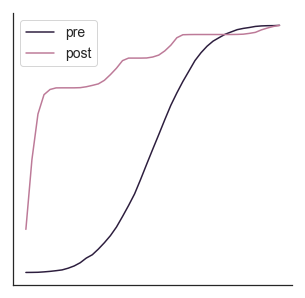

<Figure size 504x504 with 0 Axes>

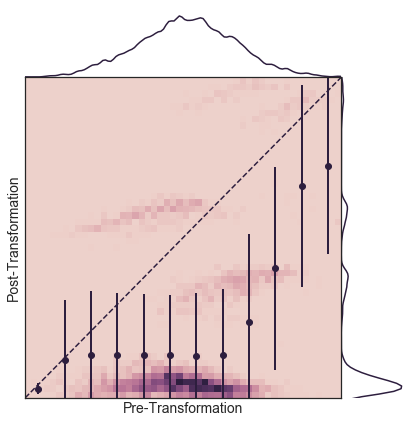

In [42]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_SIMLR_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/cones_SIMLR_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

---
# Colon

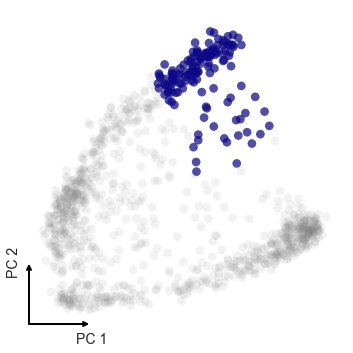

In [43]:
colon_PCA2 = fcc_PCA(matrix=colon.arcsinh_norm(), barcodes=colon.barcodes, n_components=2)
colon_PCA2.plot_barcodes(ranks=['3']) # mature goblet cells

In [44]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='arcsinh'), post=colon_PCA2.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['3']), post=colon_PCA2.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['PCA (2)'], final_distance_stats['Colon']['EMD']['PCA (2)'], final_distance_stats['Colon']['KLD']['PCA (2)'], final_distance_stats['Colon']['Knn Pres.']['PCA (2)'] = mantel_stats[0], EMD, KLD, knn

R: 0.684
EMD: 0.0854
KLD: 0.1405
Knn Pres.: 81.6122
CPU times: user 371 ms, sys: 33.7 ms, total: 405 ms
Wall time: 376 ms


CPU times: user 17.4 s, sys: 319 ms, total: 17.7 s
Wall time: 17 s


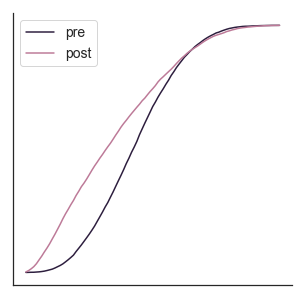

<Figure size 504x504 with 0 Axes>

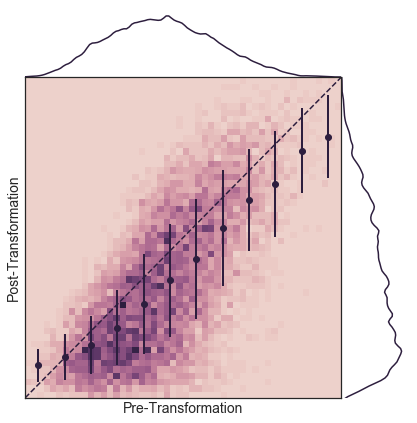

In [45]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_PCA2_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_PCA2_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

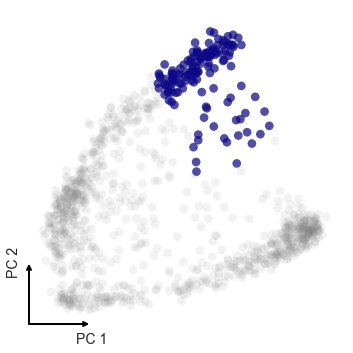

In [46]:
colon_PCA10 = fcc_PCA(matrix=colon.arcsinh_norm(), barcodes=colon.barcodes, n_components=10)
colon_PCA10.plot_barcodes(ranks=['3']) # mature goblet cells

In [47]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='arcsinh'), post=colon_PCA10.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['3']), post=colon_PCA10.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['PCA (10)'], final_distance_stats['Colon']['EMD']['PCA (10)'], final_distance_stats['Colon']['KLD']['PCA (10)'], final_distance_stats['Colon']['Knn Pres.']['PCA (10)'] = mantel_stats[0], EMD, KLD, knn

R: 0.7964
EMD: 0.0424
KLD: 0.0433
Knn Pres.: 84.1939
CPU times: user 380 ms, sys: 25.9 ms, total: 406 ms
Wall time: 356 ms


CPU times: user 17.5 s, sys: 343 ms, total: 17.8 s
Wall time: 17.2 s


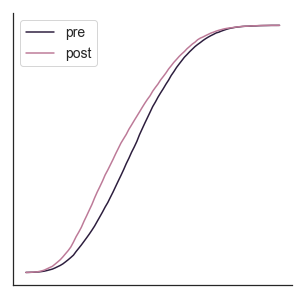

<Figure size 504x504 with 0 Axes>

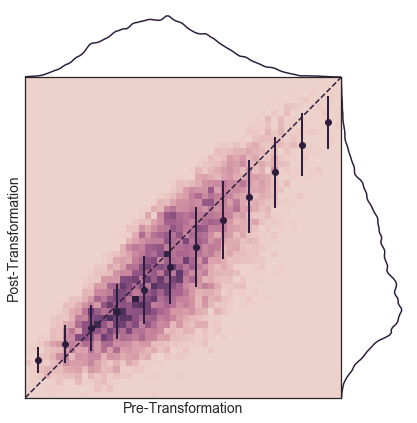

In [48]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_PCA10_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_PCA10_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

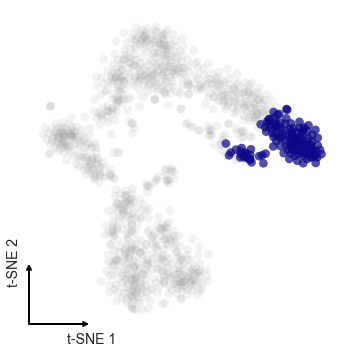

In [49]:
colon_tSNE = DR.from_file('pymethods_out/colon_tSNE.csv', name='t-SNE', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_tSNE.plot_barcodes(ranks=['3']) # mature goblet cells

In [50]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='arcsinh'), post=colon_tSNE.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['3']), post=colon_tSNE.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['t-SNE'], final_distance_stats['Colon']['EMD']['t-SNE'], final_distance_stats['Colon']['KLD']['t-SNE'], final_distance_stats['Colon']['Knn Pres.']['t-SNE'] = mantel_stats[0], EMD, KLD, knn

R: 0.6834
EMD: 0.0792
KLD: 0.1062
Knn Pres.: 82.949
CPU times: user 373 ms, sys: 25.5 ms, total: 398 ms
Wall time: 338 ms


CPU times: user 17.4 s, sys: 323 ms, total: 17.7 s
Wall time: 17 s


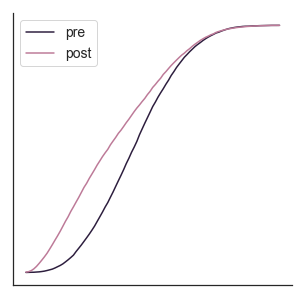

<Figure size 504x504 with 0 Axes>

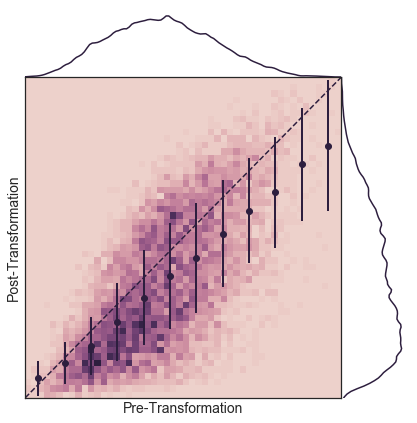

In [51]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_tSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_tSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

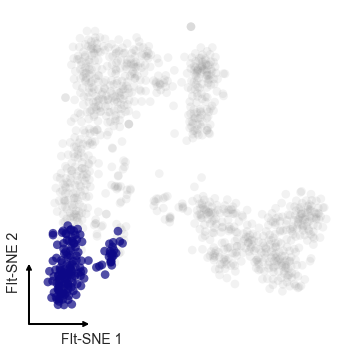

In [52]:
colon_FItSNE = DR.from_file('pymethods_out/colon_FItSNE.csv', name='FIt-SNE', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_FItSNE.plot_barcodes(ranks=['3']) # mature goblet cells

In [53]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='arcsinh'), post=colon_FItSNE.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['3']), post=colon_FItSNE.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['FIt-SNE'], final_distance_stats['Colon']['EMD']['FIt-SNE'], final_distance_stats['Colon']['KLD']['FIt-SNE'], final_distance_stats['Colon']['Knn Pres.']['FIt-SNE'] = mantel_stats[0], EMD, KLD, knn

R: 0.6634
EMD: 0.0877
KLD: 0.1198
Knn Pres.: 82.6633
CPU times: user 390 ms, sys: 26.9 ms, total: 417 ms
Wall time: 360 ms


CPU times: user 17.3 s, sys: 315 ms, total: 17.7 s
Wall time: 16.9 s


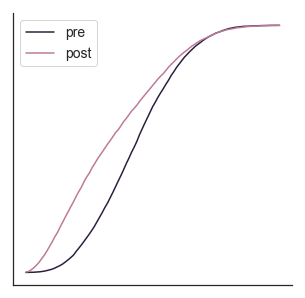

<Figure size 504x504 with 0 Axes>

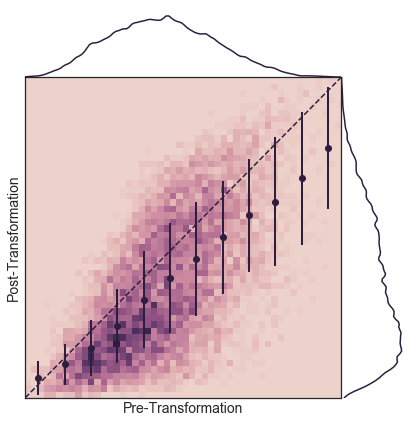

In [54]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_FItSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_FItSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

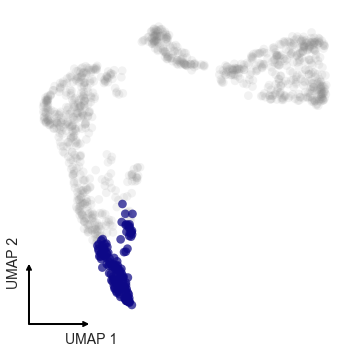

In [55]:
colon_UMAP = DR.from_file('pymethods_out/colon_UMAP.csv', name='UMAP', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_UMAP.plot_barcodes(ranks=['3']) # rods & cones

In [56]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='arcsinh'), post=colon_UMAP.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['3']), post=colon_UMAP.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['UMAP'], final_distance_stats['Colon']['EMD']['UMAP'], final_distance_stats['Colon']['KLD']['UMAP'], final_distance_stats['Colon']['Knn Pres.']['UMAP'] = mantel_stats[0], EMD, KLD, knn

R: 0.5708
EMD: 0.1174
KLD: 0.1785
Knn Pres.: 79.398
CPU times: user 376 ms, sys: 24.3 ms, total: 400 ms
Wall time: 340 ms


CPU times: user 17.6 s, sys: 346 ms, total: 18 s
Wall time: 17.4 s


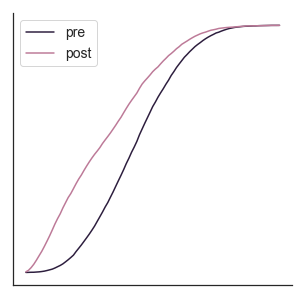

<Figure size 504x504 with 0 Axes>

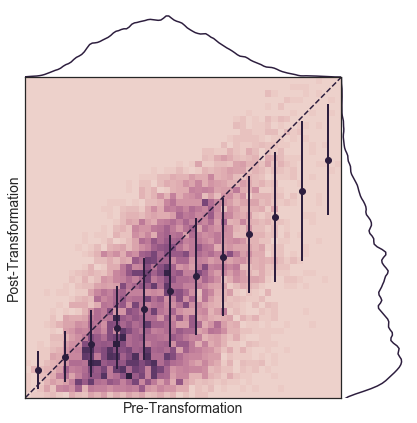

In [57]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_UMAP_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_UMAP_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

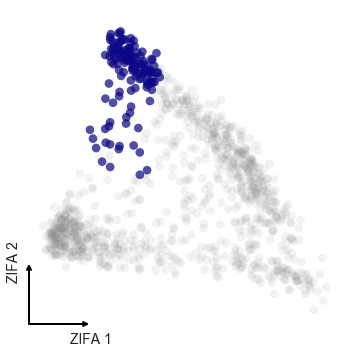

In [10]:
colon_ZIFA = DR.from_file('pymethods_out/colon_ZIFA.csv', name='ZIFA', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_ZIFA.plot_barcodes(ranks=['3']) # mature goblet cells

In [11]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='log2'), post=colon_ZIFA.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='log2', ranks=['3']), post=colon_ZIFA.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['ZIFA'], final_distance_stats['Colon']['EMD']['ZIFA'], final_distance_stats['Colon']['KLD']['ZIFA'], final_distance_stats['Colon']['Knn Pres.']['ZIFA'] = mantel_stats[0], EMD, KLD, knn

R: 0.562
EMD: 0.0523
KLD: 0.2226
Knn Pres.: 76.2755
CPU times: user 326 ms, sys: 20.3 ms, total: 347 ms
Wall time: 352 ms


CPU times: user 17.6 s, sys: 381 ms, total: 18 s
Wall time: 17.4 s


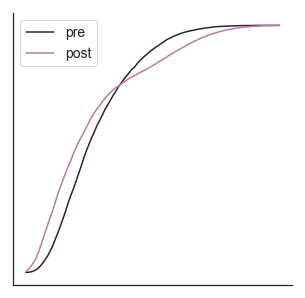

<Figure size 504x504 with 0 Axes>

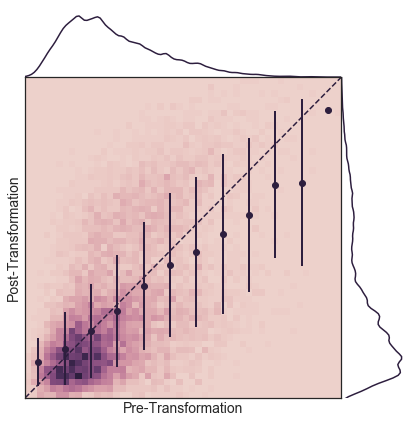

In [12]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_ZIFA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_ZIFA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

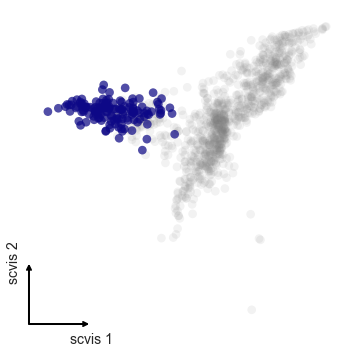

In [61]:
colon_scvis = DR.from_file('scvis_out/colon/perplexity_30_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.tsv', name='scvis', labels=[0,0], barcodefile='pymethods_out/colon_clu.csv')
colon_scvis.plot_barcodes(ranks=['3']) # mature goblet cells

In [62]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_scvis.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_scvis.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['scvis'], final_distance_stats['Colon']['EMD']['scvis'], final_distance_stats['Colon']['KLD']['scvis'], final_distance_stats['Colon']['Knn Pres.']['scvis'] = mantel_stats[0], EMD, KLD, knn

R: 0.8749
EMD: 0.0128
KLD: 0.0598
Knn Pres.: 93.7041
CPU times: user 364 ms, sys: 18.2 ms, total: 382 ms
Wall time: 361 ms


CPU times: user 17.2 s, sys: 372 ms, total: 17.6 s
Wall time: 17 s


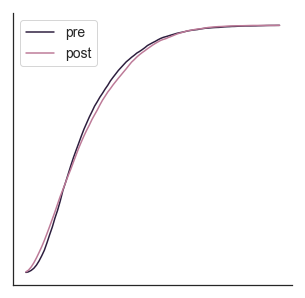

<Figure size 504x504 with 0 Axes>

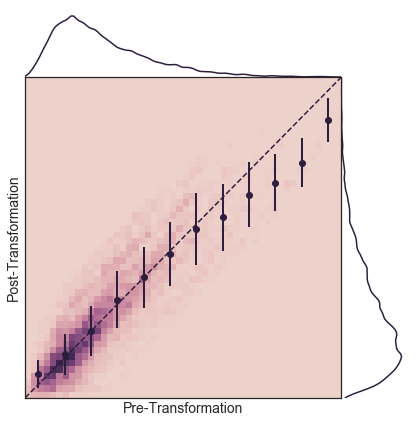

In [63]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_scvis_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_scvis_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

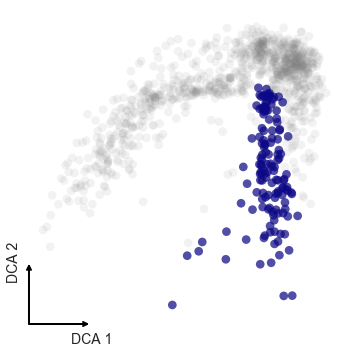

In [64]:
colon_DCA = DR.from_file('pymethods_out/colon_DCA.csv', name='DCA', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_DCA.plot_barcodes(ranks=['3']) # mature goblet cells
colon_DCA.plot_barcodes(ranks=['3'], figsize=(4,4), save_to='../images/goblet_DCA.png')

In [65]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_DCA.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_DCA.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['DCA'], final_distance_stats['Colon']['EMD']['DCA'], final_distance_stats['Colon']['KLD']['DCA'], final_distance_stats['Colon']['Knn Pres.']['DCA'] = mantel_stats[0], EMD, KLD, knn

R: 0.4702
EMD: 0.0355
KLD: 0.2583
Knn Pres.: 72.7755
CPU times: user 367 ms, sys: 23.7 ms, total: 390 ms
Wall time: 294 ms


CPU times: user 17.5 s, sys: 411 ms, total: 17.9 s
Wall time: 17.3 s


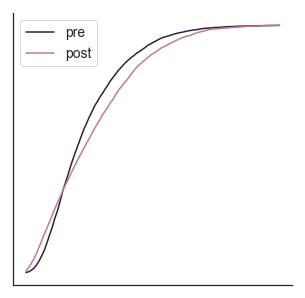

<Figure size 504x504 with 0 Axes>

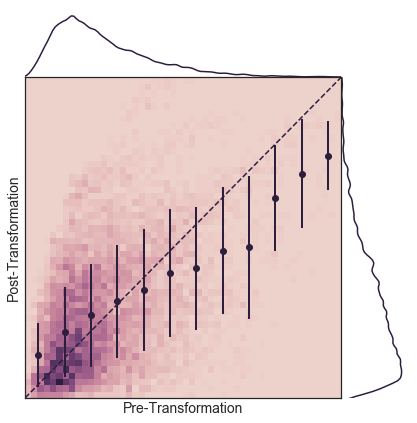

In [66]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_DCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_DCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

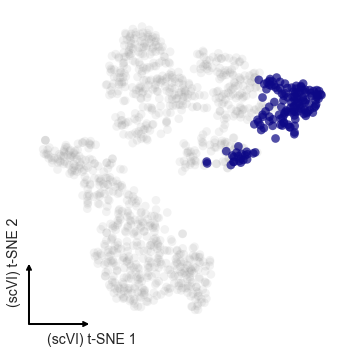

In [67]:
colon_scVI = DR.from_file('pymethods_out/colon_scVI.csv', name='scVI', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_scVI_tSNE = DR.from_file('pymethods_out/colon_scVI_tSNE.csv', name='(scVI) t-SNE', labels=[None,None], barcodefile='pymethods_out/colon_clu.csv')
colon_scVI_tSNE.plot_barcodes(ranks=['3']) # rods & cones

In [68]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_scVI.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_scVI.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['scVI'], final_distance_stats['Colon']['EMD']['scVI'], final_distance_stats['Colon']['KLD']['scVI'], final_distance_stats['Colon']['Knn Pres.']['scVI'] = mantel_stats[0], EMD, KLD, knn

R: 0.1941
EMD: 0.1594
KLD: 0.224
Knn Pres.: 69.3367
CPU times: user 347 ms, sys: 22 ms, total: 369 ms
Wall time: 319 ms


CPU times: user 17.2 s, sys: 320 ms, total: 17.6 s
Wall time: 16.8 s


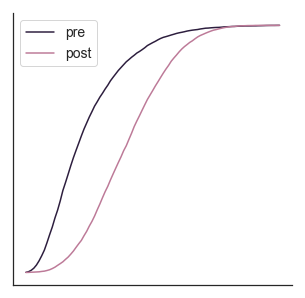

<Figure size 504x504 with 0 Axes>

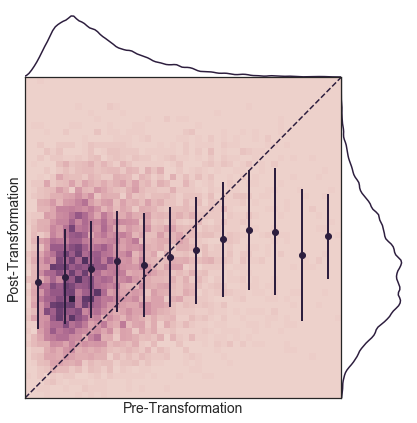

In [69]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_scVI_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_scVI_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

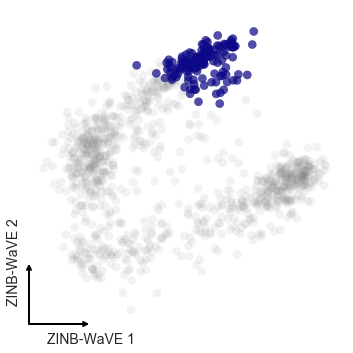

In [70]:
colon_ZINBWAVE = DR.from_file('Rmethods_out/colon_ZINB-WAVE.csv', name='ZINB-WaVE', labels=[None,0], barcodefile='pymethods_out/colon_clu.csv')
colon_ZINBWAVE.plot_barcodes(ranks=['3']) # mature goblet cells

In [71]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_ZINBWAVE.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_ZINBWAVE.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['ZINBWAVE'], final_distance_stats['Colon']['EMD']['ZINBWAVE'], final_distance_stats['Colon']['KLD']['ZINBWAVE'], final_distance_stats['Colon']['Knn Pres.']['ZINBWAVE'] = mantel_stats[0], EMD, KLD, knn

R: 0.2903
EMD: 0.0199
KLD: 0.2771
Knn Pres.: 70.1531
CPU times: user 342 ms, sys: 20.3 ms, total: 362 ms
Wall time: 319 ms


CPU times: user 17.2 s, sys: 337 ms, total: 17.5 s
Wall time: 16.8 s


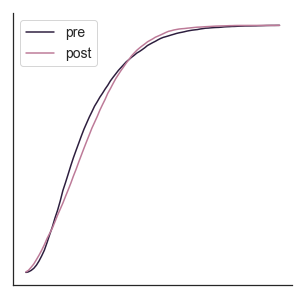

<Figure size 504x504 with 0 Axes>

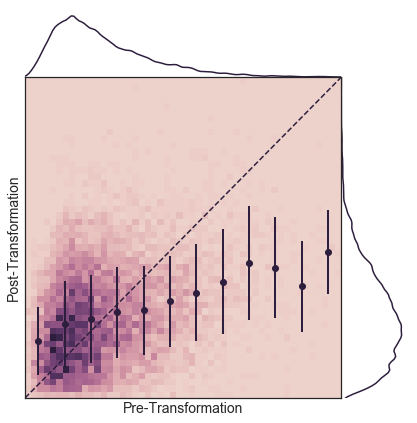

In [72]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_ZINBWAVE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_ZINBWAVE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

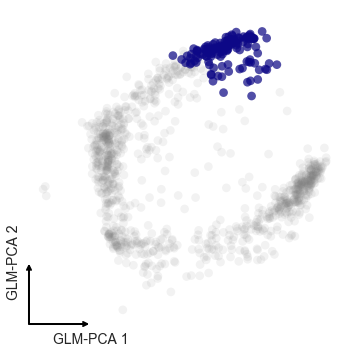

In [73]:
colon_GLMPCA = DR.from_file('Rmethods_out/colon_GLM-PCA.csv', name='GLM-PCA', labels=[None,0], barcodefile='pymethods_out/colon_clu.csv')
colon_GLMPCA.plot_barcodes(ranks=['3']) # mature goblet cells

In [74]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform=None), post=colon_GLMPCA.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['3']), post=colon_GLMPCA.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['GLMPCA'], final_distance_stats['Colon']['EMD']['GLMPCA'], final_distance_stats['Colon']['KLD']['GLMPCA'], final_distance_stats['Colon']['Knn Pres.']['GLMPCA'] = mantel_stats[0], EMD, KLD, knn

R: 0.1685
EMD: 0.0237
KLD: 0.351
Knn Pres.: 69.0918
CPU times: user 338 ms, sys: 18.6 ms, total: 357 ms
Wall time: 312 ms


CPU times: user 17.1 s, sys: 315 ms, total: 17.4 s
Wall time: 16.7 s


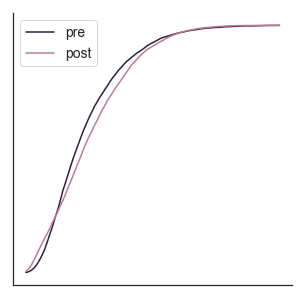

<Figure size 504x504 with 0 Axes>

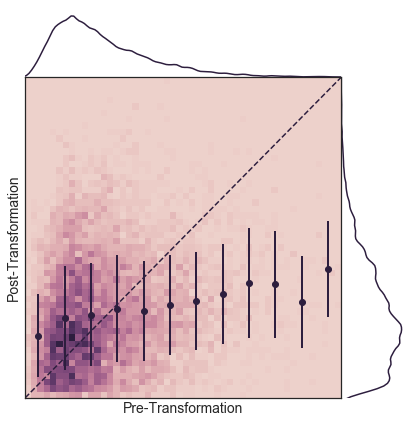

In [75]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_GLMPCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_GLMPCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

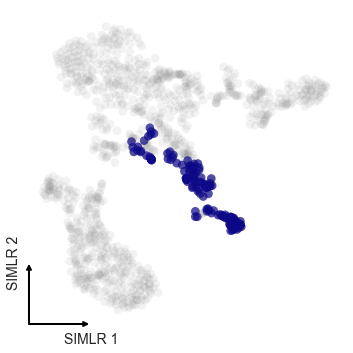

In [76]:
colon_SIMLR = DR.from_file('Rmethods_out/colon_SIMLR_F.csv', name='SIMLR', labels=[None,0], barcodefile='pymethods_out/colon_clu.csv')
colon_SIMLR.plot_barcodes(ranks=['3']) # mature goblet cells

In [77]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['3'],transform='arcsinh'), post=colon_SIMLR.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['3']), post=colon_SIMLR.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['SIMLR'], final_distance_stats['Colon']['EMD']['SIMLR'], final_distance_stats['Colon']['KLD']['SIMLR'], final_distance_stats['Colon']['Knn Pres.']['SIMLR'] = mantel_stats[0], EMD, KLD, knn

R: 0.3658
EMD: 0.1031
KLD: 0.2638
Knn Pres.: 82.2551
CPU times: user 390 ms, sys: 27.6 ms, total: 417 ms
Wall time: 363 ms


CPU times: user 17.5 s, sys: 318 ms, total: 17.8 s
Wall time: 17.1 s


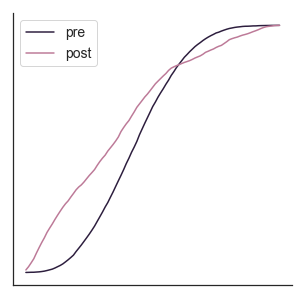

<Figure size 504x504 with 0 Axes>

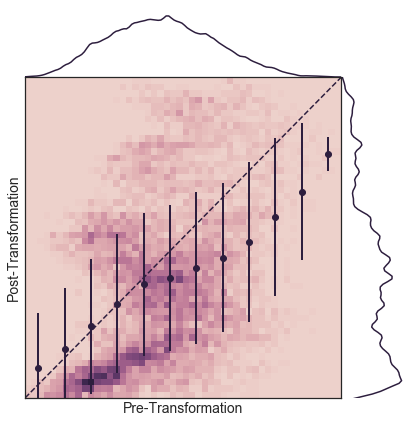

In [78]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_SIMLR_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_SIMLR_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

---
### Summary Metrics

In [79]:
retina_sum = pd.DataFrame(final_distance_stats['Retina'])
retina_sum = retina_sum.sort_values(by='R')
retina_sum = retina_sum.reindex(['EMD','KLD','R','Knn Pres.'], axis=1)
retina_sum.to_csv('retina_local_metrics.csv')

In [14]:
retina_sum = retina_sum.drop('KLD', axis=1) # dropping KL divergence

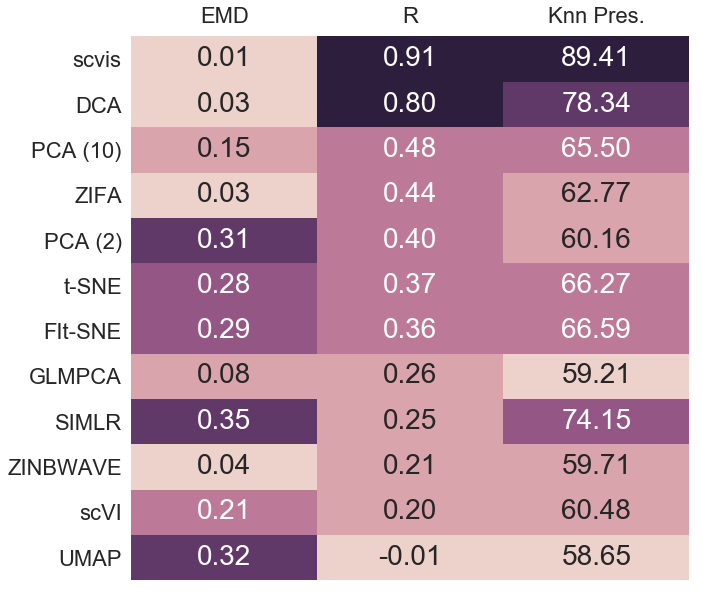

In [19]:
retina_norm=(retina_sum-retina_sum.mean())/retina_sum.std()
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
ax = sns.heatmap(retina_norm, annot=retina_sum, cmap=sns.cubehelix_palette(), robust=True, annot_kws={"size": 28}, fmt='.2f', cbar=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.tick_params(top=False)
plt.savefig(fname='../images/retina_local_metrics.png', transparent=True, bbox_inches='tight')

In [83]:
colon_sum = pd.DataFrame(final_distance_stats['Colon'])
colon_sum = colon_sum.sort_values(by='R')
colon_sum = colon_sum.reindex(['EMD','KLD','R','Knn Pres.'], axis=1)
colon_sum.to_csv('colon_local_metrics.csv')

In [22]:
colon_sum = colon_sum.drop('KLD', axis=1) # dropping KL divergence

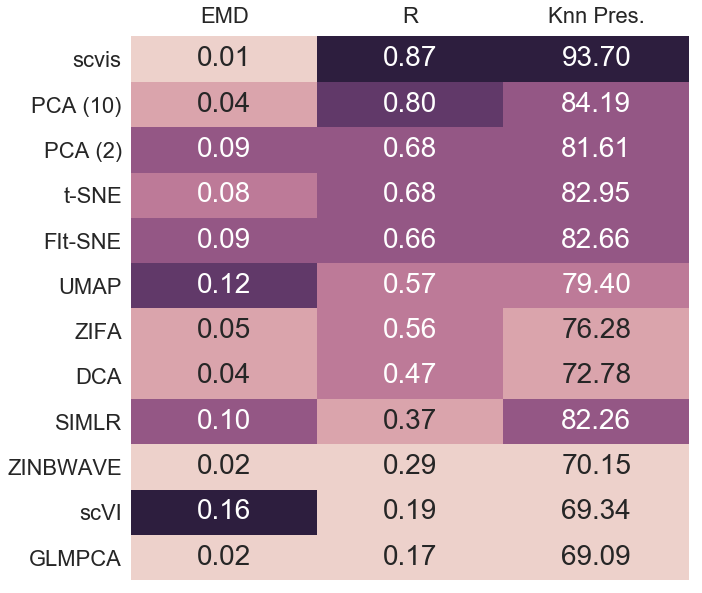

In [23]:
colon_norm=(colon_sum-colon_sum.mean())/colon_sum.std()
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
ax = sns.heatmap(colon_norm, annot=colon_sum, cmap=sns.cubehelix_palette(), robust=True, annot_kws={"size": 28}, fmt='.2f', cbar=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.tick_params(top=False)
plt.savefig(fname='../images/colon_local_metrics.png', transparent=True, bbox_inches='tight')